<a href="https://colab.research.google.com/github/yunpengliDataScience/Skin_Cancer_ML_DL/blob/main/Skin_Cancer_Analysis/EDA_YunpengLi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import os
from imageio import imread
from PIL import Image
from glob import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


**Mout google drive:**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


**Create project root path:**

In [3]:
project_root_path_string = '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/'

print("project_root_path_string:", project_root_path_string)

project_root_path_string: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/


In [4]:
sys.path.append(project_root_path_string)

sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/']

**Get the root data directory:**

In [5]:
data_root_path = os.path.join(project_root_path_string, 'data') 

print("data_root_path:", data_root_path)

data_root_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data


**Get the raw image data directory:**

In [6]:
raw_data_path =  os.path.join(data_root_path, 'raw_image_data') 
print("raw_data_path:", raw_data_path)

raw_data_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data


**Get the tabular data path:**

In [7]:
tabular_data_path = os.path.join(data_root_path, 'tabular_data') 

print("tabular_data_path:", tabular_data_path)

tabular_data_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/tabular_data


**Read metadata into a panda data frame:**

In [8]:
metaData_pd = pd.read_csv(os.path.join(tabular_data_path, 'metadata.csv'))

In [9]:
metaData_pd

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARM,NaN,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,NECK,6.0,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FACE,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAND,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,False,1.0,FOREARM,5.0,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAND,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1708_3156_175.png,False
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,CHEST,13.0,12.0,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True
2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOREARM,NaN,NaN,SEK,False,False,False,False,False,False,PAT_1343_1217_404.png,False
2296,PAT_326,690,False,False,POMERANIA,POMERANIA,58,True,FEMALE,True,True,False,False,3.0,FACE,5.0,4.0,BCC,True,False,False,False,False,True,PAT_326_690_823.png,True


**Summarize NaN values:**

In [10]:
count_nan_in_df = metaData_pd.isnull().sum()
print (count_nan_in_df)

patient_id               0
lesion_id                0
smoke                  804
drink                  804
background_father      818
background_mother      822
age                      0
pesticide              804
gender                 804
skin_cancer_history    804
cancer_history         804
has_piped_water        804
has_sewage_system      804
fitspatrick            804
region                   0
diameter_1             804
diameter_2             804
diagnostic               0
itch                     0
grew                     0
hurt                     0
changed                  0
bleed                    0
elevation                0
img_id                   0
biopsed                  0
dtype: int64


In [11]:
##Check missing values from the meta data
metaData_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           2298 non-null   object 
 1   lesion_id            2298 non-null   int64  
 2   smoke                1494 non-null   object 
 3   drink                1494 non-null   object 
 4   background_father    1480 non-null   object 
 5   background_mother    1476 non-null   object 
 6   age                  2298 non-null   int64  
 7   pesticide            1494 non-null   object 
 8   gender               1494 non-null   object 
 9   skin_cancer_history  1494 non-null   object 
 10  cancer_history       1494 non-null   object 
 11  has_piped_water      1494 non-null   object 
 12  has_sewage_system    1494 non-null   object 
 13  fitspatrick          1494 non-null   float64
 14  region               2298 non-null   object 
 15  diameter_1           1494 non-null   f

**Visualize skin leison category size:**

Text(0.5, 1.02, 'Number of image by cancer diagnosis type')

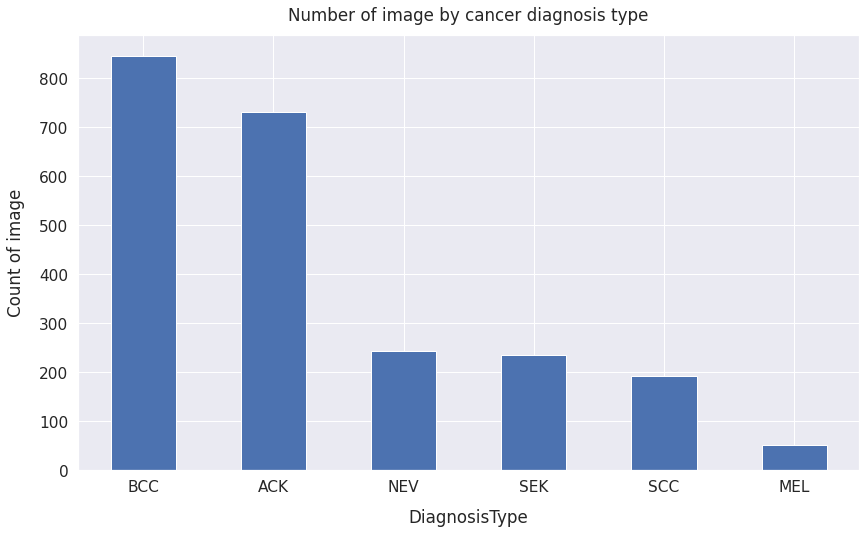

In [12]:
sns.set(font_scale=1.4)
metaData_pd['diagnostic'].value_counts().plot(kind='bar', figsize=(14, 8), rot=0)
plt.xlabel("DiagnosisType", labelpad=14)
plt.ylabel("Count of image", labelpad=14)
plt.title("Number of image by cancer diagnosis type", y=1.02)

**List all image paths:**

In [13]:
skin_image_paths = glob(os.path.join(raw_data_path, '*.png')) #glob patterns specify sets of filenames with wildcard character.

In [14]:
skin_image_paths

['/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data/PAT_456_887_499.png',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data/PAT_503_950_552.png',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data/PAT_948_1801_721.png',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data/PAT_162_252_773.png',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data/PAT_122_185_957.png',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data/PAT_691_1311_686.png',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data/PAT_788_1503_541.png',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data/PAT_212_327_532.png',
 '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data/PAT_432_851_560.png',
 '/content/gdrive/My Drive/Data606/Project/

**Create the image id and image path dictionary, so each image id has a corresponding image path, so we are able to find the exact location of each image by the image_id specified in the metadata tabular file:**

In [15]:
image_id_and_path_dict = {os.path.basename(x): x for x in skin_image_paths}

In [16]:
image_id_and_path_dict

{'PAT_456_887_499.png': '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data/PAT_456_887_499.png',
 'PAT_503_950_552.png': '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data/PAT_503_950_552.png',
 'PAT_948_1801_721.png': '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data/PAT_948_1801_721.png',
 'PAT_162_252_773.png': '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data/PAT_162_252_773.png',
 'PAT_122_185_957.png': '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data/PAT_122_185_957.png',
 'PAT_691_1311_686.png': '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data/PAT_691_1311_686.png',
 'PAT_788_1503_541.png': '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/raw_image_data/PAT_788_1503_541.png',
 'PAT_212_327_532.png': '/content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data

**View the types of skin lesion:**

In [17]:
skin_lesion_abbreviations = metaData_pd.diagnostic.unique()

print("Skin lesions:", skin_lesion_abbreviations)

Skin lesions: ['NEV' 'BCC' 'ACK' 'SEK' 'SCC' 'MEL']


**Create the lesion type abbrevation and full name dictionary:**

In [18]:
lesion_type_dict = {
    'ACK': 'Actinic Keratosis',
    'BCC': 'Basal Cell Carcinoma',
    'MEL': 'Melanoma',
    'NEV': 'Nevus',
    'SCC': 'Squamous Cell Carcinoma',
    'SEK': 'Seborrheic Keratosis'
    
}

**Add more columns in the metadata data frame for later data retrieving:**

In [19]:
metaData_pd['image_path'] = metaData_pd['img_id'].map(image_id_and_path_dict.get)  # image path
metaData_pd['cell_type'] = metaData_pd['diagnostic'].map(lesion_type_dict.get)     # cell type
metaData_pd['cell_type_label'] = pd.Categorical(metaData_pd['cell_type']).codes    # cell type class label

In [20]:
metaData_pd

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,image_path,cell_type,cell_type_label
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARM,NaN,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False,/content/gdrive/My Drive/Data606/Project/Skin_...,Nevus,3
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,NECK,6.0,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True,/content/gdrive/My Drive/Data606/Project/Skin_...,Basal Cell Carcinoma,1
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FACE,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False,/content/gdrive/My Drive/Data606/Project/Skin_...,Actinic Keratosis,0
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAND,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False,/content/gdrive/My Drive/Data606/Project/Skin_...,Actinic Keratosis,0
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,False,1.0,FOREARM,5.0,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True,/content/gdrive/My Drive/Data606/Project/Skin_...,Basal Cell Carcinoma,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAND,NaN,NaN,ACK,True,False,False,False,False,False,PAT_1708_3156_175.png,False,/content/gdrive/My Drive/Data606/Project/Skin_...,Actinic Keratosis,0
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,CHEST,13.0,12.0,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True,/content/gdrive/My Drive/Data606/Project/Skin_...,Basal Cell Carcinoma,1
2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOREARM,NaN,NaN,SEK,False,False,False,False,False,False,PAT_1343_1217_404.png,False,/content/gdrive/My Drive/Data606/Project/Skin_...,Seborrheic Keratosis,4
2296,PAT_326,690,False,False,POMERANIA,POMERANIA,58,True,FEMALE,True,True,False,False,3.0,FACE,5.0,4.0,BCC,True,False,False,False,False,True,PAT_326_690_823.png,True,/content/gdrive/My Drive/Data606/Project/Skin_...,Basal Cell Carcinoma,1


**------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Feature Engineering:**



Drop NaN rows:

In [21]:
no_nan_pd = metaData_pd.dropna()

In [22]:
no_nan_pd

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,image_path,cell_type,cell_type_label
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,NECK,6.0,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True,/content/gdrive/My Drive/Data606/Project/Skin_...,Basal Cell Carcinoma,1
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,False,1.0,FOREARM,5.0,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True,/content/gdrive/My Drive/Data606/Project/Skin_...,Basal Cell Carcinoma,1
6,PAT_778,1471,False,True,GERMANY,ITALY,52,False,FEMALE,False,True,True,True,3.0,FACE,15.0,10.0,BCC,False,True,False,True,True,True,PAT_778_1471_835.png,True,/content/gdrive/My Drive/Data606/Project/Skin_...,Basal Cell Carcinoma,1
7,PAT_117,179,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,False,False,False,1.0,FACE,15.0,10.0,BCC,True,True,True,False,True,True,PAT_117_179_983.png,True,/content/gdrive/My Drive/Data606/Project/Skin_...,Basal Cell Carcinoma,1
9,PAT_705,4015,False,True,GERMANY,GERMANY,58,True,FEMALE,True,True,True,True,1.0,FOREARM,9.0,7.0,ACK,False,True,False,False,False,False,PAT_705_4015_413.png,False,/content/gdrive/My Drive/Data606/Project/Skin_...,Actinic Keratosis,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,PAT_386,785,True,False,POMERANIA,POMERANIA,66,False,MALE,True,False,True,True,2.0,EAR,20.0,15.0,ACK,True,False,True,False,True,True,PAT_386_785_536.png,True,/content/gdrive/My Drive/Data606/Project/Skin_...,Actinic Keratosis,0
2291,PAT_273,421,False,False,POMERANIA,POMERANIA,41,True,MALE,False,False,False,False,2.0,FACE,9.0,5.0,BCC,True,UNK,True,UNK,True,True,PAT_273_421_905.png,True,/content/gdrive/My Drive/Data606/Project/Skin_...,Basal Cell Carcinoma,1
2292,PAT_491,934,False,False,POMERANIA,POMERANIA,43,True,FEMALE,True,True,False,False,2.0,FACE,9.0,5.0,SCC,True,UNK,False,UNK,True,True,PAT_491_934_46.png,True,/content/gdrive/My Drive/Data606/Project/Skin_...,Squamous Cell Carcinoma,5
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,CHEST,13.0,12.0,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True,/content/gdrive/My Drive/Data606/Project/Skin_...,Basal Cell Carcinoma,1


In [23]:
no_nan_pd = no_nan_pd.drop(columns=['image_path', 'img_id', 'patient_id', 'lesion_id'])

In [24]:
no_nan_pd

,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,biopsed,cell_type,cell_type_label
1,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,NECK,6.0,5.0,BCC,True,True,False,True,True,True,True,Basal Cell Carcinoma,1
4,False,True,POMERANIA,POMERANIA,79,False,MALE,True,False,False,False,1.0,FOREARM,5.0,5.0,BCC,True,True,False,False,True,True,True,Basal Cell Carcinoma,1
6,False,True,GERMANY,ITALY,52,False,FEMALE,False,True,True,True,3.0,FACE,15.0,10.0,BCC,False,True,False,True,True,True,True,Basal Cell Carcinoma,1
7,False,False,POMERANIA,POMERANIA,74,True,FEMALE,False,False,False,False,1.0,FACE,15.0,10.0,BCC,True,True,True,False,True,True,True,Basal Cell Carcinoma,1
9,False,True,GERMANY,GERMANY,58,True,FEMALE,True,True,True,True,1.0,FOREARM,9.0,7.0,ACK,False,True,False,False,False,False,False,Actinic Keratosis,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,True,False,POMERANIA,POMERANIA,66,False,MALE,True,False,True,True,2.0,EAR,20.0,15.0,ACK,True,False,True,False,True,True,True,Actinic Keratosis,0
2291,False,False,POMERANIA,POMERANIA,41,True,MALE,False,False,False,False,2.0,FACE,9.0,5.0,BCC,True,UNK,True,UNK,True,True,True,Basal Cell Carcinoma,1
2292,False,False,POMERANIA,POMERANIA,43,True,FEMALE,True,True,False,False,2.0,FACE,9.0,5.0,SCC,True,UNK,False,UNK,True,True,True,Squamous Cell Carcinoma,5
2294,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,True,True,True,3.0,CHEST,13.0,12.0,BCC,True,True,False,True,False,False,True,Basal Cell Carcinoma,1


In [25]:
num_cols = len(no_nan_pd.columns)

Use dython library (http://shakedzy.xyz/dython/) for correlation analysis on categorical data:

In [26]:
pip install dython

In [27]:
from dython.nominal import associations

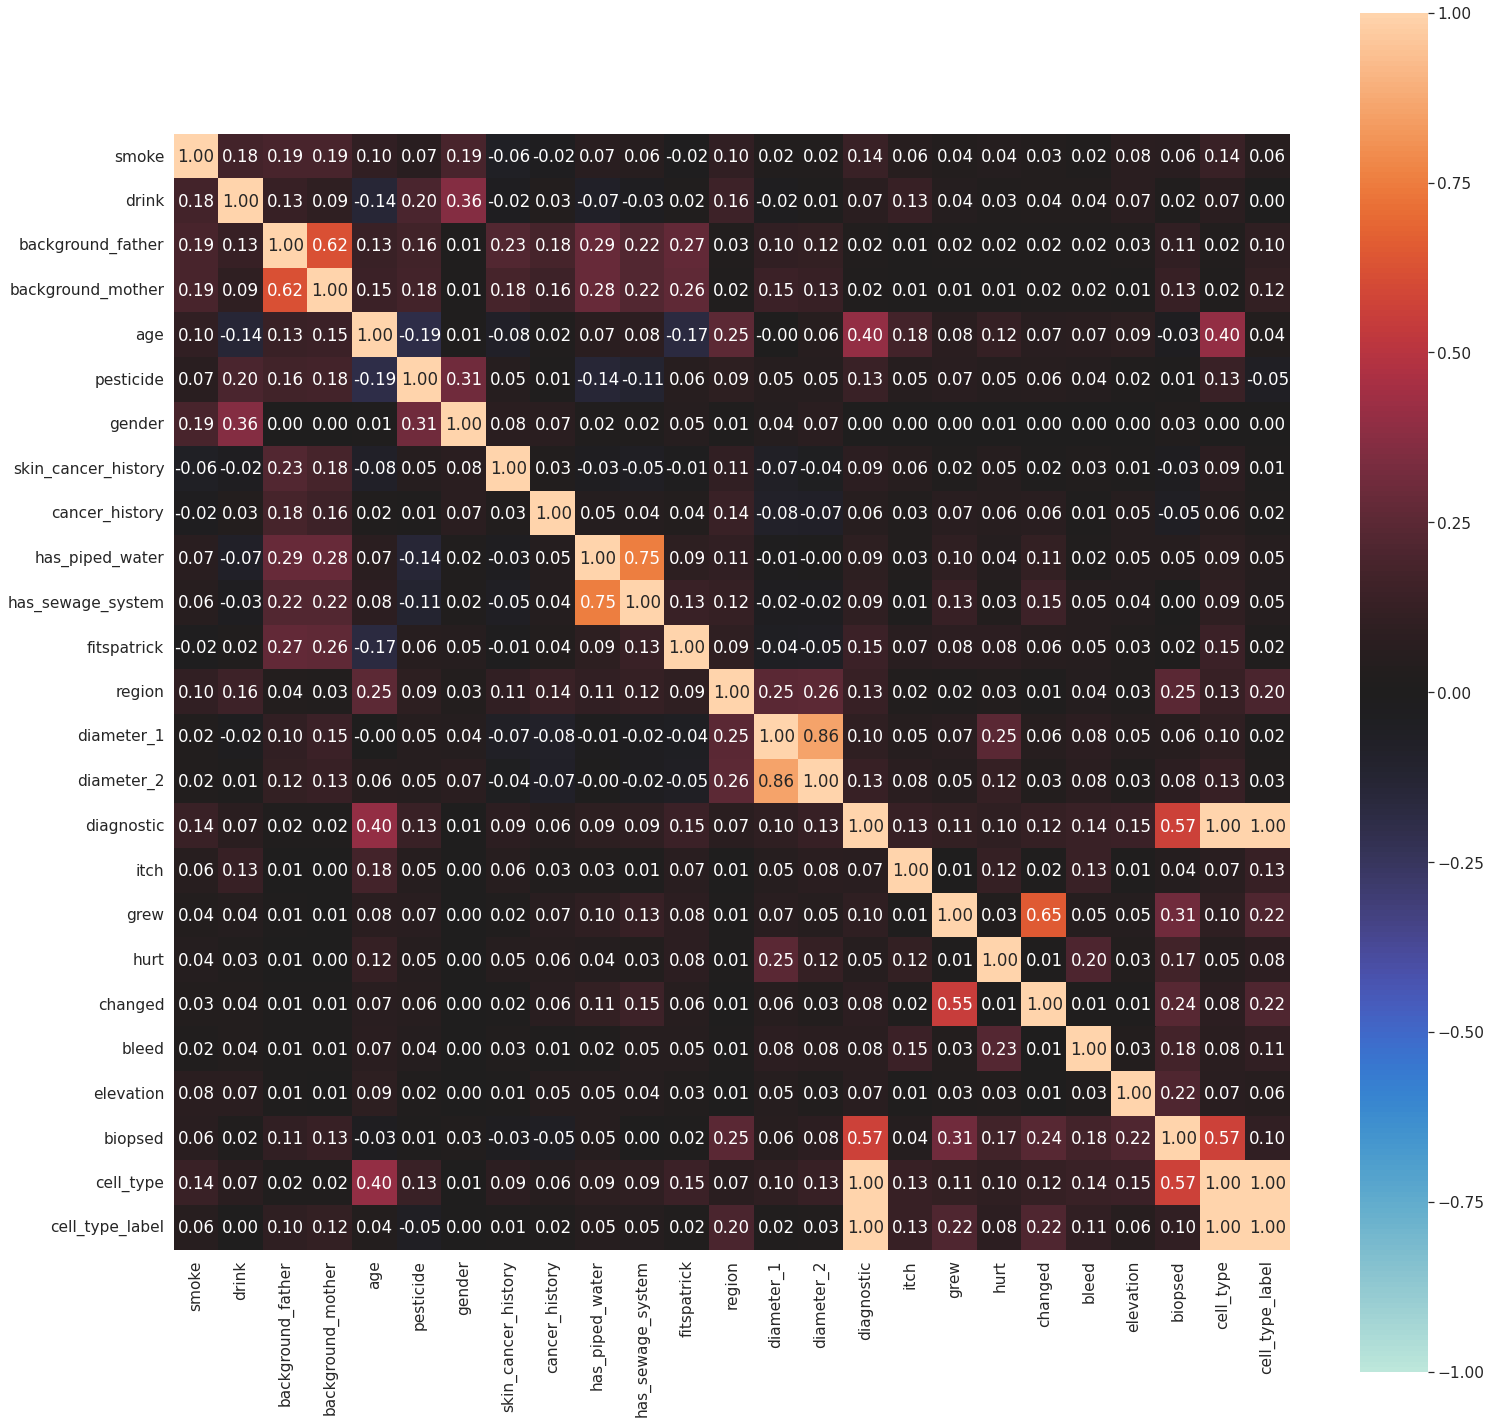

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fbb89115250>,
 'corr':                         smoke     drink  ...  cell_type  cell_type_label
 smoke                1.000000  0.177542  ...   0.135319         0.059162
 drink                0.177542  1.000000  ...   0.071417         0.001947
 background_father    0.190634  0.131612  ...   0.024376         0.096077
 background_mother    0.194493  0.094779  ...   0.020497         0.116218
 age                  0.104356 -0.135852  ...   0.403204         0.035359
 pesticide            0.066753  0.196140  ...   0.133127        -0.052068
 gender               0.194269  0.360684  ...   0.004274         0.003081
 skin_cancer_history -0.057428 -0.024904  ...   0.085768         0.010120
 cancer_history      -0.017709  0.032358  ...   0.056516         0.023039
 has_piped_water      0.067195 -0.073909  ...   0.090052         0.053042
 has_sewage_system    0.055092 -0.030090  ...   0.094377         0.045263
 fitspatrick         -0.015127  0.0200

In [28]:
associations(no_nan_pd, nom_nom_assoc='theil', figsize=(num_cols, num_cols))

**------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Create individual folder for each type of skin lesion under "processed_image_data/skin_categories" folder if it does not exist:**

In [29]:
import shutil

In [30]:
processed_image_data_path =  os.path.join(data_root_path, 'processed_image_data') 
print("processed_image_data_path:", processed_image_data_path)

skin_categories_path =  os.path.join(processed_image_data_path, 'skin_categories') 
print("skin_categories_path:", skin_categories_path)

processed_image_data_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/processed_image_data
skin_categories_path: /content/gdrive/My Drive/Data606/Project/Skin_Cancer_Analysis/data/processed_image_data/skin_categories


In [31]:
def create_skin_category_folder(skin_lesion_abbreviations, skin_categories_path):
  folder_paths = []
  isdir = os.path.isdir(skin_categories_path) 

  if not isdir:
    # Create the skin_categories folder
    print("Create skin_categories directory...")
    os.mkdir(skin_categories_path)

    # Create sub folders for each type of skin lesion
    for abbr in skin_lesion_abbreviations:
      print(abbr)
    
      path = os.path.join(skin_categories_path, abbr)
      print(path)

      os.mkdir(path)

      folder_paths.append(path)
  else:
    print("Folder skin_categories already exists.  No new folder is created.")

  return folder_paths

In [32]:
def copy_image_to_category_folder(metaData_pd, folder_paths):

  row_count = metaData_pd.shape[0]

  for i in range(row_count):
    m = metaData_pd.iloc[i]['diagnostic']
    for j in  folder_paths:
      k = os.path.splitext(os.path.basename(j))[0]
      if  m == k :
        shutil.copy(metaData_pd.iloc[i]['image_path'], j)

In [33]:
folder_paths = create_skin_category_folder(skin_lesion_abbreviations, skin_categories_path)

Folder skin_categories already exists.  No new folder is created.


In [34]:
if len(folder_paths) > 0:  # Only copy images when new sub folders have been created in previous step.
  copy_image_to_category_folder(metaData_pd, folder_paths)
  print("Images have been copied and arranged in categories.")

**Use Torchvision to show sample images with class labels:**

In [35]:
import torch
import torchvision
from torchvision import transforms

In [36]:
all_images = torchvision.datasets.ImageFolder(skin_categories_path)

In [37]:
all_images.classes

['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK']

In [38]:
all_images.class_to_idx

{'ACK': 0, 'BCC': 1, 'MEL': 2, 'NEV': 3, 'SCC': 4, 'SEK': 5}

In [39]:
train_size = int(len(all_images)*0.8)
test_size = len(all_images)-train_size

train_data, test_data = torch.utils.data.random_split(all_images, (train_size, test_size))

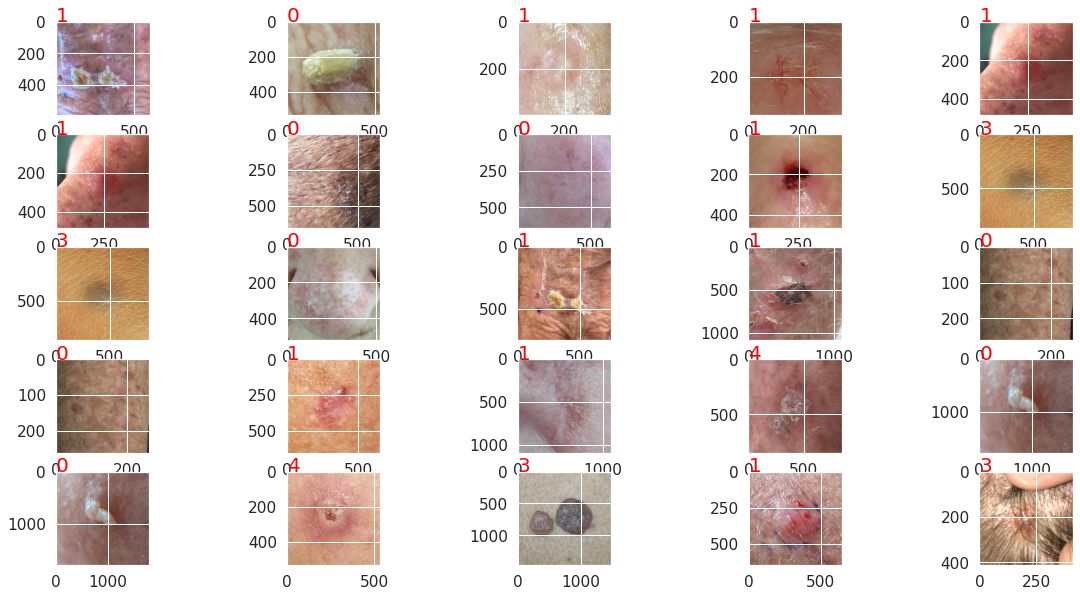

In [40]:
row = 5
col = 5

f, axarr = plt.subplots(row, col, figsize=(20,10))
for i in range(row):
    for j in range(col):
        x, y = test_data[i*4+j]
        axarr[i,j].imshow(x)
        axarr[i,j].text(0.0, 0.5, str(round(y,2)), dict(size=20, color='red'))

**TODO**

In [41]:
from sklearn.feature_selection import mutual_info_classif

In [42]:
score=mutual_info_classif(no_nan_pd.smoke.values, no_nan_pd.smoke.values)

ValueError: ignored

In [ ]:
B = 64
train_loader = DataLoader(train_data, batch_size=B, shuffle=True)
test_loader = DataLoader(test_data, batch_size=B)